Focus on the relation between linear and least squares (function minimization) and projections.

## Least square projection

By projecting an orthogonal vector on a line to the data points, we find the minimum distance from a point and the model line.  
This orthogonal vector is visualized with a dotted blue line below, and the resulting projected points are shown as orange points on the model.  
This projection is essentially from a 2-dimensional grid onto a 1-dimensional line allowing us to determine the distance between a point and a line.  


P:
 [[0.8 0.4]
 [0.4 0.2]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]



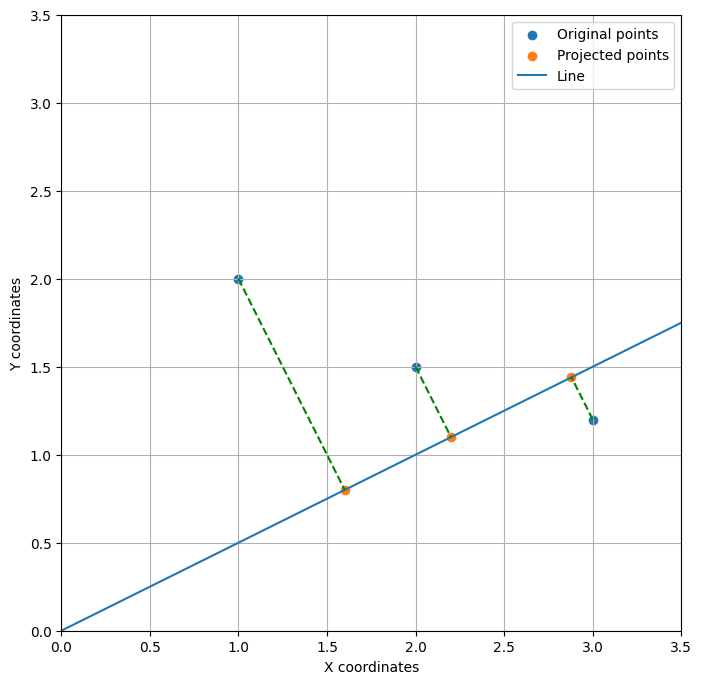

In [52]:
import numpy as np
import matplotlib.pyplot as plt

""" Code borrowed from iml.itu.dk """
# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T  #  has to be a column vector

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

#projection the points with matrix multiplication
x_prime = P @ X
print("projected points:\n", x_prime)

# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)
# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')
# Add grid lines
plt.grid(True)
# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
print()

In the above example, we projected the points $X$ onto the model line $A$. We constructed a matrix representation of the line as a column vector $A = \begin{bmatrix} 1 \\ 0.5 \end{bmatrix}$ and then construct the projection matrix as follows:  
$P = (A \cdot (A^TA)^{-1}) \cdot A^T$  

We can then find the projected points $X'$ on $A$ by matrix multiplication: $X' = P \cdot X$.

With a derivation isolating the weights for a model $w$ we get the following formula for a least square projection:  
$w = (A^TA)^{-1}\cdot A^T y$  
or in numpy/python:

[-0.4         2.36666667]
[1.96666667 1.56666667 1.16666667]


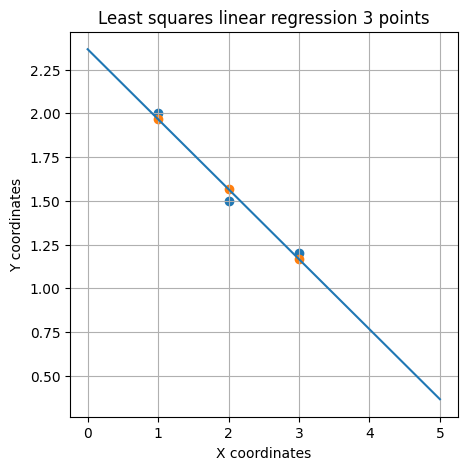

In [ ]:
# Extract x-values
x_vals = X[0, :]
# Extract y-values
y_vals = X[1, :]

# Convert to a column vector and stack a column of 1s representing a design matrix
A = np.vstack((x_vals, np.ones(x_vals.shape))).T

# The discussed design matrix for P

P = np.linalg.inv(A.T @ A) @ A.T
# Applying the transformation and calculating the weights for the model
w = P @ y_vals

print(w)

# Projected y-values:
y_hat = A @ w
print(y_hat)

x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates") 
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()


Now we can see the above graph for the blue points $y$ and the projected orange points $y_hat$ on the blue line representing the least squares solution. The total error, which is the sum of all errors squared ($e = ||y - \hat{y}||$)

In [25]:
def errors(y_vals, y_hat):
    diff = y_vals - y_hat
    e = np.sqrt(diff @ diff.T)
    rms = np.sqrt((diff * diff.T).mean())
    return e, rms

e, rms = errors(y_vals, y_hat)
print("e:", e)
print("rms:", rms)

e: 0.0816496580927725
rms: 0.047140452079103105


Let's repeat the process for a polynomial model

A:
 [[ 1.  1.  1.]
 [ 4.  2.  1.]
 [ 9.  3.  1.]
 [16.  4.  1.]
 [25.  5.  1.]]
e: 0.6324555320336761
rms: 0.2828427124746191


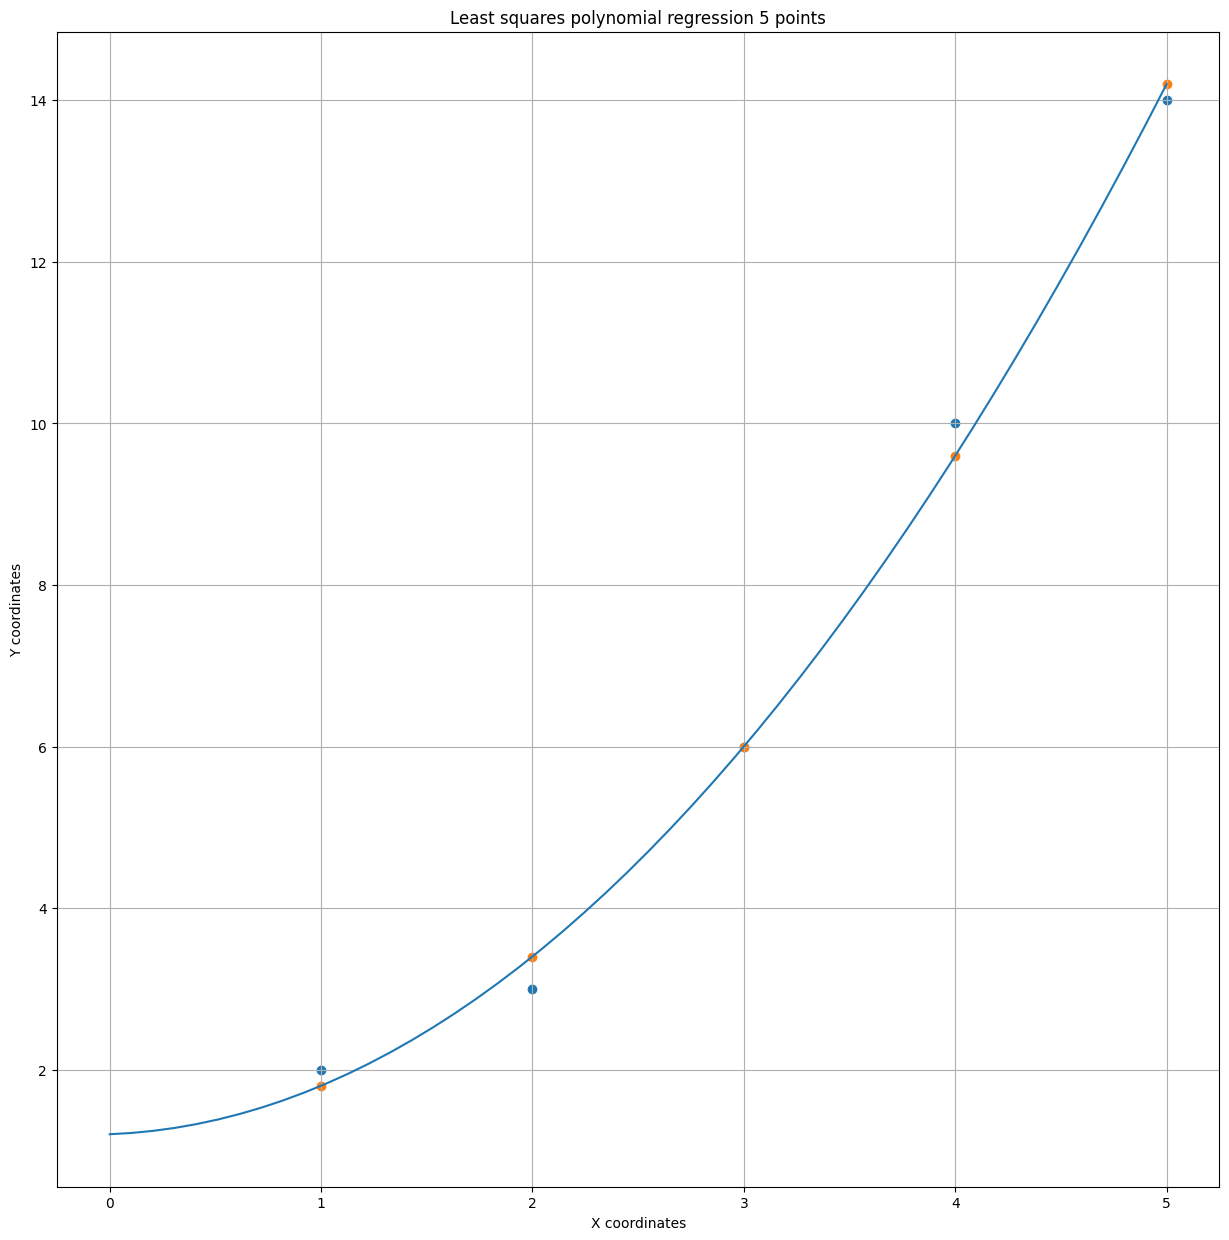

In [48]:
quadratic_dataset = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6],
                                [4, 10],
                                [5, 14]])

X_q = quadratic_dataset[:,0]
y_q_vals = quadratic_dataset[:,1]

A_quadratic = np.column_stack([X_q ** 2, X_q, np.ones(len(X_q))])
print("A:\n", A_quadratic) # design matrix
P_quadratic = np.linalg.inv(A_quadratic.T @ A_quadratic) @ A_quadratic.T

w_q = P_quadratic @ y_q_vals

y_q_hat = A_quadratic @ w_q

e, rms = errors(y_q_vals, y_q_hat)

print("e:", e)
print("rms:", rms)

plt.figure(figsize=(15, 15))
x_q = np.linspace(0, 5)
y_q = w_q[0] * (x_q ** 2) + w_q[1] * x + w_q[2]

plt.plot(x_q, y_q)  # Plot line
plt.scatter(quadratic_dataset[:, 0], quadratic_dataset[:, 1])  # Plot original points

plt.scatter(quadratic_dataset[:, 0], y_q_hat)  # Plot the points
plt.title('Least squares polynomial regression 5 points')
plt.xlabel("X coordinates") 
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()
